<a href="https://colab.research.google.com/github/AdeebBinHuda/Deep-Learning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's a bullet-point summary of what we've done in this project:

Loaded Data: Read column_2C_weka.csv into a DataFrame.
Inspected Data: Checked for missing values and data types.
Defined Variables: Separated features (X) and target (y).
Split Data: Divided data into training and testing sets.
Scaled Features: Applied StandardScaler to the data.
Initialized KMeans: Set up KMeans with 3 clusters.
Performed Clustering: Ran KMeans on scaled data to create clusters.
Calculated ARI: Measured Adjusted Rand Index to evaluate clusters against original classes.
Visualized Clusters: Plotted clusters and original classes for comparison.
Created Contingency Table: Showed how original classes are distributed in each cluster.
Graphed Contingency Table: Visualized the class distribution within clusters as a bar chart.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running the code, you'll see a link asking you to authorize Google Drive. Click the link, select your Google account, and grant the necessary permissions. Once authorized, your Google Drive will be mounted at `/content/drive`.

In [2]:
import pandas as pd

file_path = '/content/drivee/MyDrive/column_2C_weka.csv your drive'
df = pd.read_csv(file_path)
display(df.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
# check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [4]:
# show the datatype
print('Data types of each column:')
df.info()

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
# import necessary library including K nearsest neighbour
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# drop class from the row and show the dataset
df = df.drop('class', axis=1)
display(df.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [15]:
# Define the target variable y
y = df['class']
display(y.head())

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [19]:
# standaredScalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier inspection, preserving column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled_df.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (248, 6)
Shape of X_test: (62, 6)
Shape of y_train: (248,)
Shape of y_test: (62,)


In [20]:
from sklearn.cluster import KMeans

# Initialize KMeans with a specified number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')

# Fit KMeans to the scaled data and predict cluster labels
clusters = kmeans.fit_predict(X_scaled_df)

# Add the cluster labels to a new DataFrame for analysis
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

display(df_clustered.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Cluster
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1


In [22]:
display(df_clustered.head(20))

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Cluster
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal,1


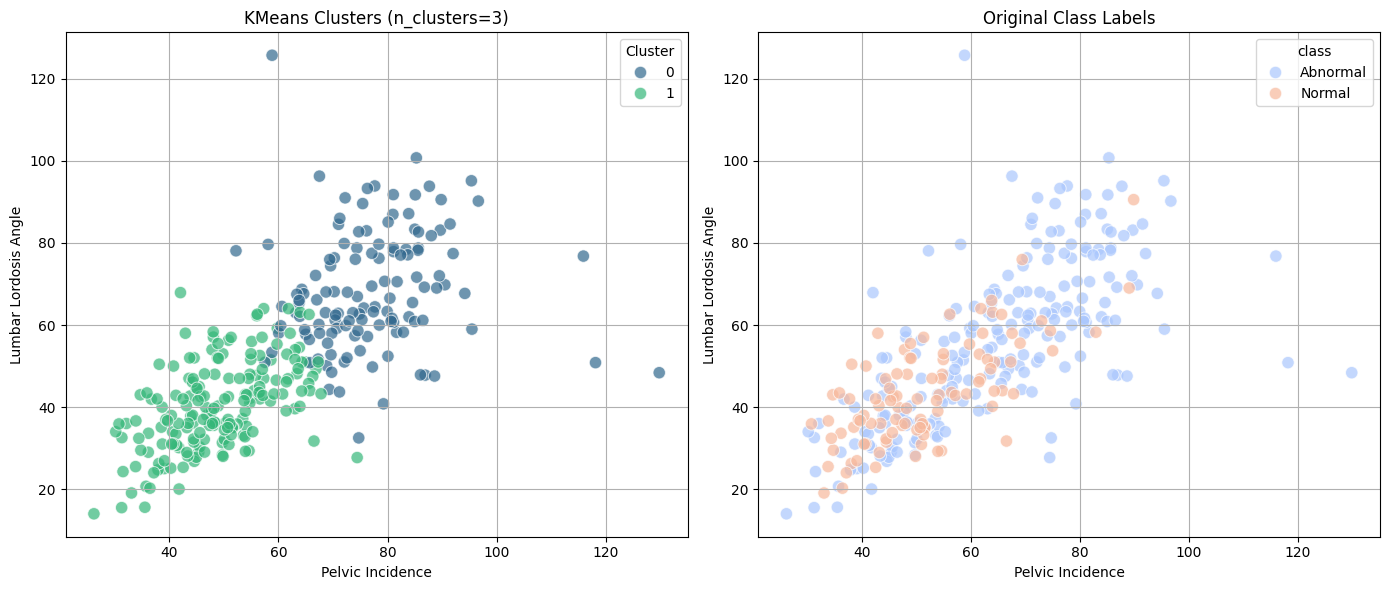

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot 1: Clusters from KMeans
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.scatterplot(data=df_clustered, x='pelvic_incidence', y='lumbar_lordosis_angle', hue='Cluster', palette='viridis', s=80, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=3)')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Lumbar Lordosis Angle')
plt.grid(True)

# Plot 2: Original Class Labels
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(data=df_clustered, x='pelvic_incidence', y='lumbar_lordosis_angle', hue='class', palette='coolwarm', s=80, alpha=0.7)
plt.title('Original Class Labels')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Lumbar Lordosis Angle')
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
import pandas as pd

# Create a contingency table (cross-tabulation) between true labels and cluster assignments
# 'y' contains the true class labels
# 'clusters' contains the KMeans predicted cluster labels for the entire dataset
contingency_table = pd.crosstab(index=y, columns=clusters, rownames=['True Class'], colnames=['KMeans Cluster'])

display(contingency_table)

print("\nInterpretation: This table shows how many samples of each 'True Class' fall into each 'KMeans Cluster'.")
print("For example, the first row indicates how many 'Abnormal' cases were assigned to Cluster 0 and Cluster 1.")

KMeans Cluster,0,1
True Class,,
Abnormal,117,93
Normal,10,90



Interpretation: This table shows how many samples of each 'True Class' fall into each 'KMeans Cluster'.
For example, the first row indicates how many 'Abnormal' cases were assigned to Cluster 0 and Cluster 1.


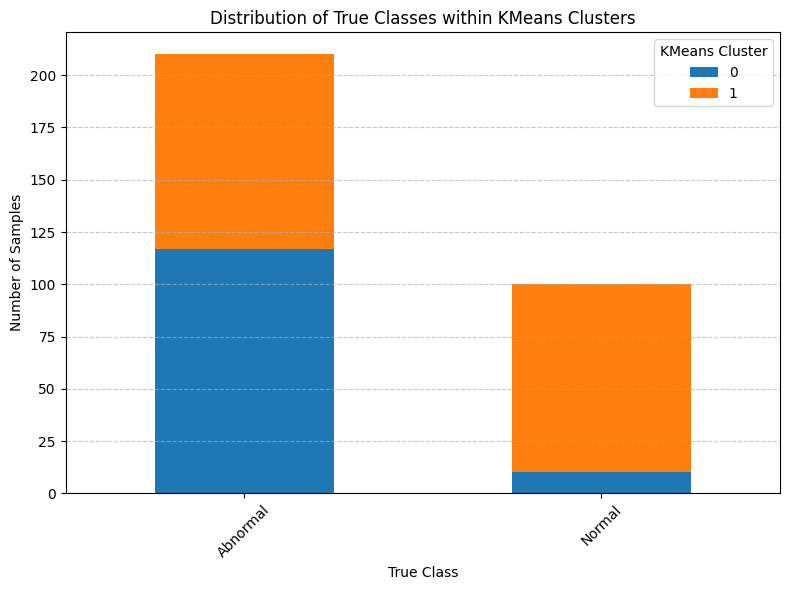

In [30]:
import matplotlib.pyplot as plt

# Plotting the contingency table as a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribution of True Classes within KMeans Clusters')
plt.xlabel('True Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='KMeans Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()